In [89]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [90]:
df = pd.read_csv("training.csv")

In [91]:
df.head()

,epoch,satellite,vBatAverage,elapsedEclipseTime
0,2015-05-28 16:43:07+00:00,SACD,33.039115,0
1,2015-05-28 16:43:15+00:00,SACD,33.039115,0
2,2015-05-28 16:43:23+00:00,SACD,33.039115,0
3,2015-05-28 16:43:31+00:00,SACD,33.039115,0
4,2015-05-28 16:43:39+00:00,SACD,33.039115,0


In [92]:
import copy

def feet(vba, eet):
    if ((vba < 33)and(eet==0)):
        return 1
    else:
        return eet


def ecl_correct(df_e):
    df_s = copy.copy(df_e)
    
    df_s['elapsedEclipseTime'] = list(map(lambda vba, eet: feet(vba, eet), df_s['vBatAverage'], df_s['elapsedEclipseTime']))
    return df_s
    

In [93]:
df = ecl_correct(df)

In [97]:
df.head(1)

,epoch,satellite,vBatAverage,elapsedEclipseTime
0,2015-05-28 16:43:07+00:00,SACD,33.039115,0


In [98]:
X = df.iloc[:, 3:4].values

In [99]:
y = df.iloc[:, 2].values 

In [100]:
from sklearn.linear_model import LinearRegression 

In [101]:
lin = LinearRegression() 

In [102]:
lin.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
poly = PolynomialFeatures(degree = 4) 

In [105]:
X_poly = poly.fit_transform(X) 

In [106]:
poly.fit(X_poly, y) 

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [107]:
lin2 = LinearRegression() 

In [108]:
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

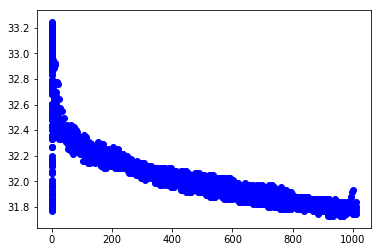

In [109]:
plt.scatter(X, y, color = 'blue') 

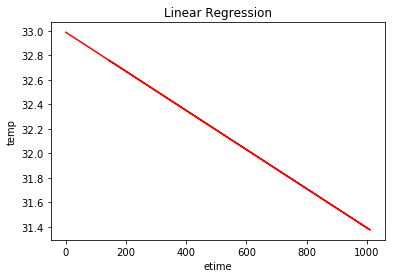

In [110]:
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('etime') 
plt.ylabel('temp') 
  
plt.show() 

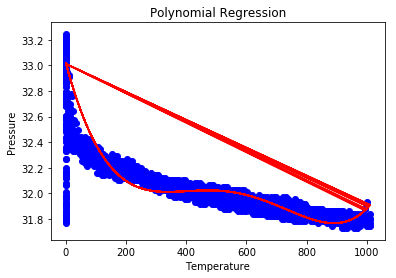

In [111]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [112]:
lin2.predict(poly.fit_transform(110.0)) 

ValueError: Expected 2D array, got scalar array instead:
array=110.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [88]:
# Predicting a new result with Polynomial Regression 
lin2.predict(poly.fit_transform(110.0)) 

ValueError: Expected 2D array, got scalar array instead:
array=110.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.